## Notebook 19: Recursion and Complexity
Andrea Lommen, April 2020 and May 2021 \\
Rachel Langgin, July 2024

In [ ]:
## Imports
import numpy as np
import matplotlib.pyplot as plt

## Recursion

In [ ]:
# A recursive function is one that calls itself.  Here's an example:
def fibonacci(n):
   if n == 1 or n == 2:
      return 1
   else:
#      print("Calculating fibonacci ", n-1, "and", n-2)
      return (fibonacci(n-1) + fibonacci(n-2))


In [ ]:
fibonacci(20)

6765

In [ ]:
# What does the fibonacci "sequence" look like?  (This is a very
# famous sequence.)

for i in range(1,20):
    print(fibonacci(i))

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


So every number is the sum of the previous two.  Let's think about what happens when
we ask python to calculate fibonacci(4).  It keeps calling itself until it gets back to
n=2 and then finally it stops.  

Let's use the fancy technique we learned last week to plot it:
(This was new, both in the way we are creating a figure object "fig" and in
how we created the y-values.  What we discovered in the last class
is that this second technique is really useful for functions that can't
handle being passed an array.  The one above is a good example.  Because there's
an "if" statement, fibonacci() will not be able to accept arrays of numbers
as argument.)

In [ ]:
# Rachel showing you this doesn't work
xvals= np.arange(1,20)
yvals = fibonacci(xvals)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

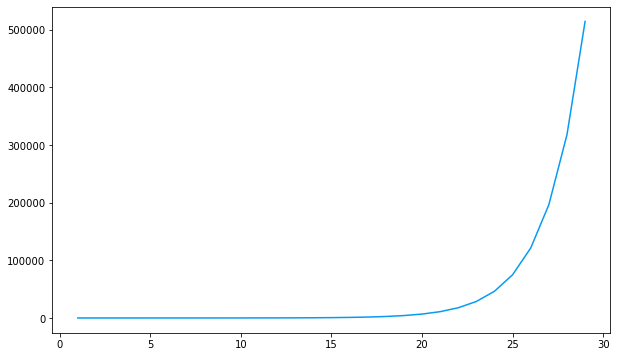

In [ ]:
xvals = np.arange(1,30)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
yvals = [fibonacci(x) for x in xvals] #<- Andrea starting to be fan of this syntax
ax.plot(xvals, yvals, color='xkcd:azure')

This function is a pretty interesting study of the complexity of code.  If you put 40 as the second argument of "range" in the first line the code takes WAY longer than if you put 20 there.  Can you see why?

(In the paragraph below I'm using "f" as short-hand for fibonacci.)

To calculate the Nth fibonacci number it has to calculate f(N-2) and f(N-1),
Calcating f(N=10) requires it to calculate f(9) and f(8) and each of those
require it to calculate two more.
And it has to keep doing that until it
gets back to N=1. So to calculate the Nth number in the sequent requires something
like $2^N$ operations.

So calculating the sequence up to 20 takes something like $2^{20}$  operations (a million operations) where as calculating it up to 10 takes something like $2^{10}$ operations (a thousand operations).  Those are very rough numbers.

The point is that the complexity of the code expands like $2^N$, not just N.   That's a very fancy way of saying that if you ask for the first 10 numbers in the fibonacci sequence it will take much longer than 10 times how long it takes to get the first number in the fibonacci sequence.  In fact, it'll take 2^10 times as long (1000 times as long.)

In [ ]:
# Andrea using python as a calculator to calculate those numbers above
print (pow(2,20))
print (pow(2,10))
print (pow(2,20)/(pow(2,10)))

1048576
1024
1024.0


Let's see if we can measure how much longer N=20 takes than N=10. (Because I think if we
all compare 40 to 20 we'll crash the hub.)

In [ ]:
import time
time.time()

1652138501.6269178

In [ ]:
time.time()

1652138501.634515

In [ ]:
time.time()

1652138501.6467452

In [ ]:
import time

start = time.time()
xvals = np.arange(1,10)
yvals = [fibonacci(x) for x in xvals]
end = time.time()
print("Time for N=10 is ", end - start)
time4ten=end-start

start = time.time()
xvals = np.arange(1,20)
yvals = [fibonacci(x) for x in xvals]
end = time.time()
print("Time for N=20 is ", end - start)
time4twenty = end-start

print("The ratio of the times is: ", time4twenty/time4ten)


Time for N=10 is  0.00032782554626464844
Time for N=20 is  0.013760089874267578
The ratio of the times is:  41.97381818181818


So my calculation overestimated the time as a function of N, but not by much (it's the same
'order of magnitude' as we say in physics.  If we had more time
we could investigate!)

(Before class I did the N=20 and N=40 and got 14,000 times longer for the N=40.  It
actually took almost 3 minutes.  I decided that was a bad idea to have all of you
do that.)

Why do we care about the complexity of code?  Well, let's say you took my advice and when you worked on the data for your project, you took a very small version of the csv to work with at first.  You took the first 100 lines when actually your data is 500,000 lines long. You run your code, and it takes 10 seconds to run.  You get everything working great and then you start to worry about how long it's going to take when you use the full 500,000-line version of the table!  If your code has O(N) then 500,000 lines of data is going to take 5000 times as long as 100 lines. That's 50,000 seconds, or 833 minutes, or about 14 hours.

Well, you could set it running over night and it would be done sometime the next day, so that's doable.

But what if it's $O(N^2)$? That means that it'll take $5000^2$ times as long to run which is just under 80 years.  So now you're screwed.

That's why people care about complexity.

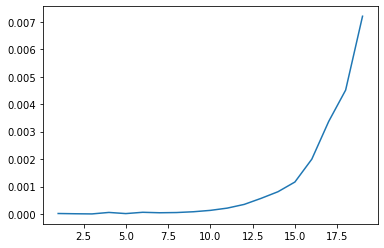

In [ ]:
# We could do this in a loop and get a plot of how much time it takes vs N
timetakes=[]
for i in range (1,20):  # I want to start with 1 not 0, because fibonacci is only
    # defined starting at 1
    start = time.time()
    xvals = np.arange(1,i)
    yvals = [fibonacci(x) for x in xvals]
    end = time.time()
    timetakes.append(end - start)
N = np.arange(1,20)
plt.plot(N, timetakes)


What does this curve suggest is the real relationship between N and time should be??  We know how to do that!! That's fitting!!  

In [ ]:
# Import the curve-fit library
from scipy.optimize import curve_fit

$$
y = a\times b^x
$$

array([2.21231088e-06, 1.53039645e+00])

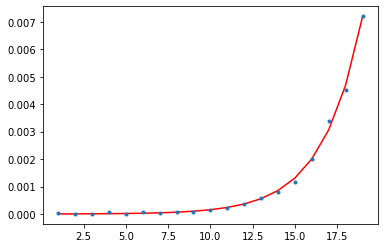

In [ ]:
def fexp(x, a, b):
    return a * pow(b,x)
popt, pcov = curve_fit(fexp, N, timetakes)
plt.plot(N, fexp(N, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

# Plot the data
plt.plot(N, timetakes, '.')

popt

So that suggests that the amount of time this code takes is proportional to ${1.6}^N$.
There's a way computer scientists talk about that.  It's called big-O notation.

"In computer science, big O notation is used to classify algorithms according to how their run time or space requirements grow as the input size grows." (Got that from wikipedia)
This source was also useful:
https://somedudesays.com/2020/01/the-basics-of-big-o-notation/

So the way to say this is our fibonacci function is O($1.6^N$).   Here's a discussion of the complexity of the fibonacci sequence specifically https://stackoverflow.com/questions/360748/computational-complexity-of-fibonacci-sequence.

Another example:  most of the functions you've used (cosine for example...) is O(N) which means that it scales as the size of the array you put in there.